## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

Index(['LogReturn', 'RSI2', 'MA10', 'MA30', 'MA200', 'EMA10', 'EMA30',
       'EMA200', 'ROC10', 'ROC30', 'MOM10', 'MOM30', '%K10', '%D10', '%K30',
       '%D30', 'VIX', 'RiskFreeRate', 'Volume', 'Adj Close', 'Close', 'High',
       'Low', 'Open', 'delta', 'gamma', 'theta', 'vega', 'rho', 'vol',
       'OptionPrice'],
      dtype='object')
(3242, 31)
(434, 31)
(3242, 8)
(434, 8)
(3242, 10)
(434, 10)


<string>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<string>:49: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
<string>:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


## Loading Existing Models

Episode 0/1000, Total Reward: -193.74540327880263, P&L: -8.937612701543067, Std Dev P&L: nan
Episode 100/1000, Total Reward: -274.6431557438856, P&L: -2.8229968134271957, Std Dev P&L: 95.32128496520008
Episode 200/1000, Total Reward: -876.0202975314029, P&L: -10.127576332606452, Std Dev P&L: 184.40384966176123
Episode 300/1000, Total Reward: -57.07559626727616, P&L: 164.68696717657886, Std Dev P&L: 155.15884950548894
Episode 400/1000, Total Reward: -3.7736964231455747, P&L: 52.56561561465041, Std Dev P&L: 101.49456678892938
Episode 500/1000, Total Reward: -5.07411057019481, P&L: -84.72886183627372, Std Dev P&L: 237.6115186060824
Episode 600/1000, Total Reward: -6.053516340008718, P&L: -184.27536713360797, Std Dev P&L: 225.08044505546093
Episode 700/1000, Total Reward: -0.18910232381480893, P&L: 72.52391197006595, Std Dev P&L: 119.00880251918127
Episode 800/1000, Total Reward: -0.7219027737210787, P&L: -44.7184235767868, Std Dev P&L: 120.1998262184238
Episode 900/1000, Total Reward: -0.

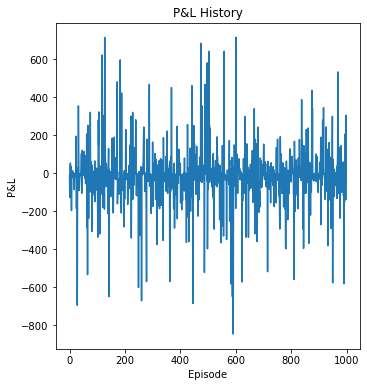

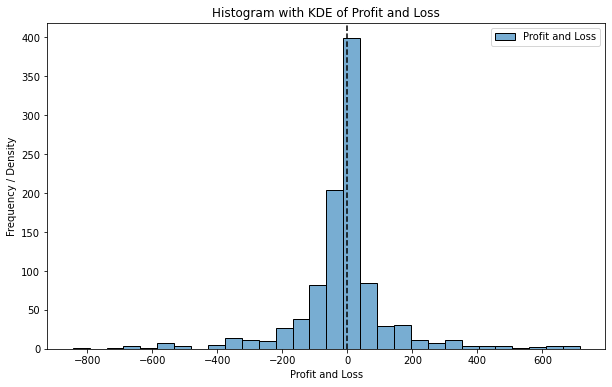

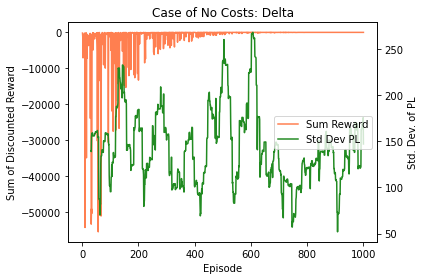

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

<string>:219: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:180: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:186: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Episode 0/1000, Total Reward: -22506.744251335724, P&L: 196.1751341257268, Std Dev P&L: nan
Episode 100/1000, Total Reward: -336.0620731552368, P&L: -0.0008391393890860854, Std Dev P&L: 161.10237962384346
Episode 200/1000, Total Reward: -144.19828714208737, P&L: 43.473940272675904, Std Dev P&L: 177.3096679745442
Episode 300/1000, Total Reward: -9.625374735925769, P&L: 13.6609384543031, Std Dev P&L: 140.70868798541116
Episode 400/1000, Total Reward: -94.51217183067097, P&L: -149.36521355492917, Std Dev P&L: 88.55624383622904
Episode 500/1000, Total Reward: -169.58825452318223, P&L: 145.6435460274073, Std Dev P&L: 109.45010672339974
Episode 600/1000, Total Reward: -124.48969154193962, P&L: 215.34077671393484, Std Dev P&L: 140.1859678676908
Episode 700/1000, Total Reward: -0.8388423350023352, P&L: 75.18466975383299, Std Dev P&L: 121.27567487744739
Episode 800/1000, Total Reward: -18.204361370716, P&L: -312.3525467616987, Std Dev P&L: 128.73318320521508
Episode 900/1000, Total Reward: -0.0

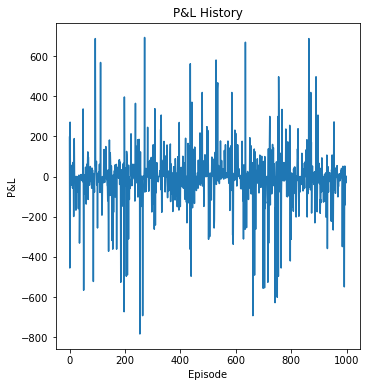

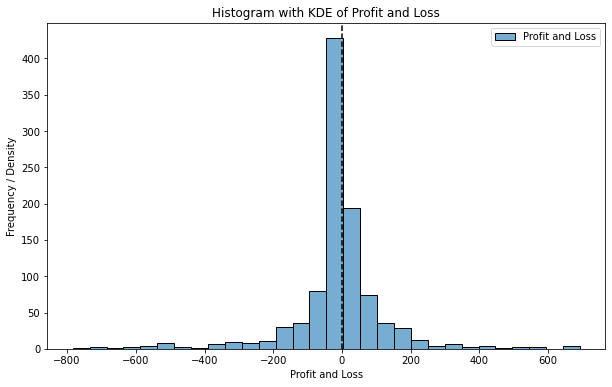

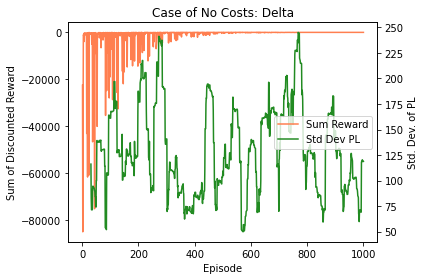

In [4]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


<string>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
<string>:55: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Episode 0/1000, Total Reward: -49249.64930701055, P&L: -154.8409078487989, Std Dev P&L: nan
Episode 100/1000, Total Reward: -432.62681595094546, P&L: -9.184305001901594, Std Dev P&L: 82.14433106996688
Episode 200/1000, Total Reward: -26.70323090586494, P&L: -3.217765709898597, Std Dev P&L: 201.6781755918913
Episode 300/1000, Total Reward: -34.21277521449589, P&L: -101.56116163899983, Std Dev P&L: 94.87396367205343
Episode 400/1000, Total Reward: -6.280231856711782, P&L: 68.78013445418307, Std Dev P&L: 113.57514783414916
Episode 500/1000, Total Reward: -459.3408144516629, P&L: -52.57572850510183, Std Dev P&L: 156.66514159385792
Episode 600/1000, Total Reward: -5.372519947165215, P&L: 47.27484198207818, Std Dev P&L: 76.65894510279617
Episode 700/1000, Total Reward: -1.9338389196338412, P&L: 64.87081785315026, Std Dev P&L: 56.43384821228548
Episode 800/1000, Total Reward: -0.22838398318995154, P&L: 38.83724516521096, Std Dev P&L: 169.30576179378443
Episode 900/1000, Total Reward: -0.60283

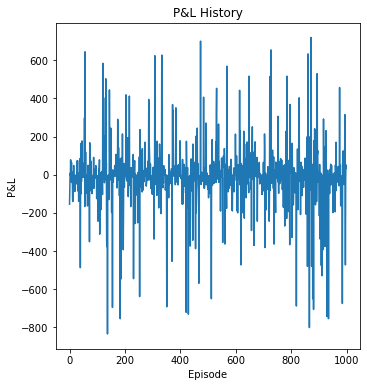

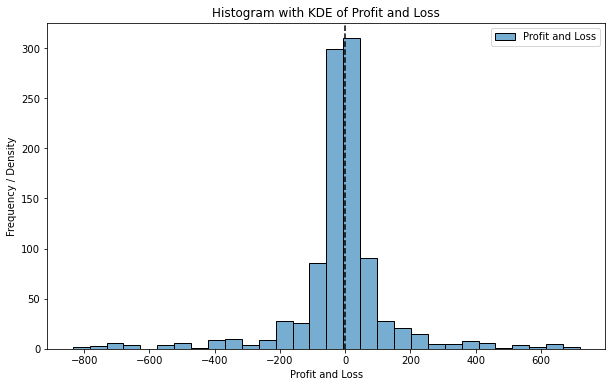

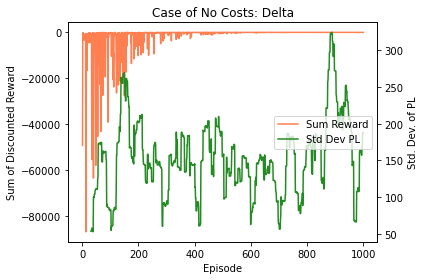

In [5]:
import DDPG2

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, std_pl_history


In [7]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


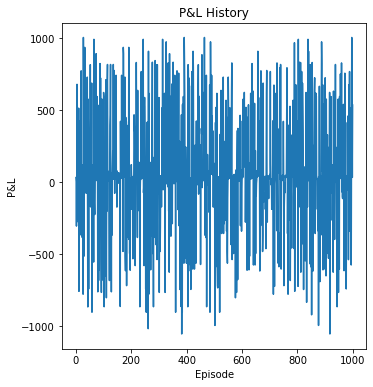

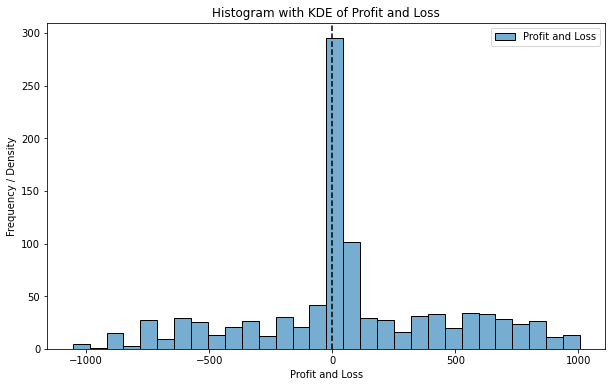

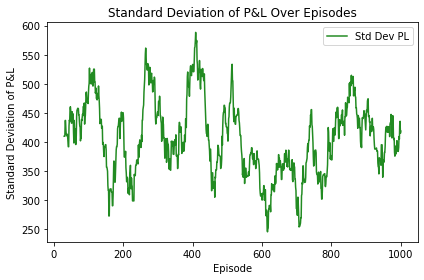

In [8]:
# Test the agent
pl_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)
episodes = np.array(list(range(1, len(pl_history_delta) + 1)))

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_delta, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()

<string>:219: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


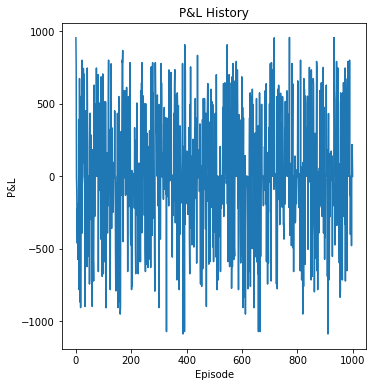

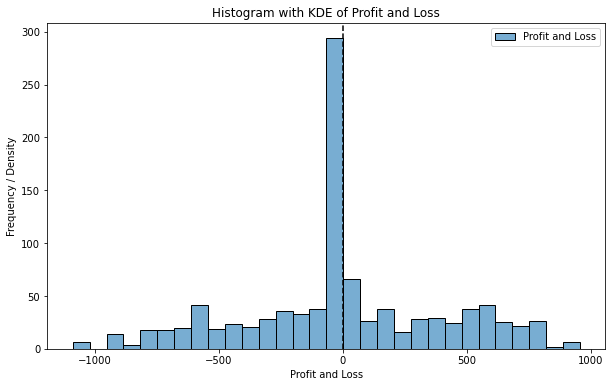

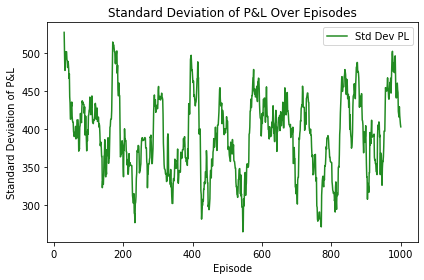

In [9]:
# Test the agent
pl_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_dqn, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()

plt.show()

<string>:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


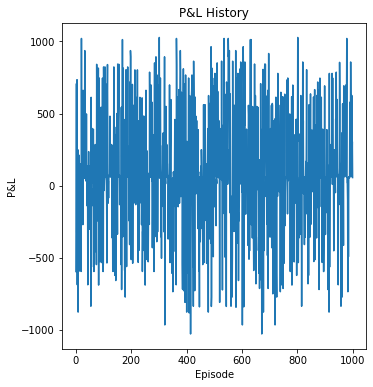

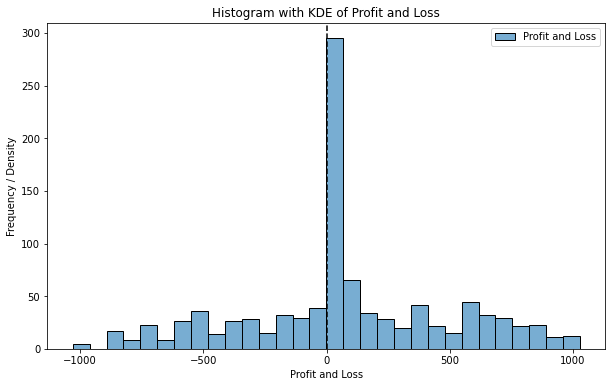

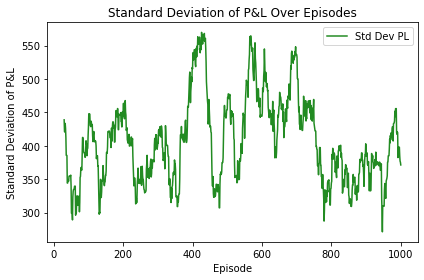

In [10]:
# Test the agent
pl_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

#Plot std
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(episodes, std_pl_ddpg, color='forestgreen', label='Std Dev PL')
ax.set_xlabel('Episode')
ax.set_ylabel('Standard Deviation of P&L')
ax.set_title('Standard Deviation of P&L Over Episodes')
ax.legend(loc='best')
plt.tight_layout()
plt.show()


plt.show()

## Combining

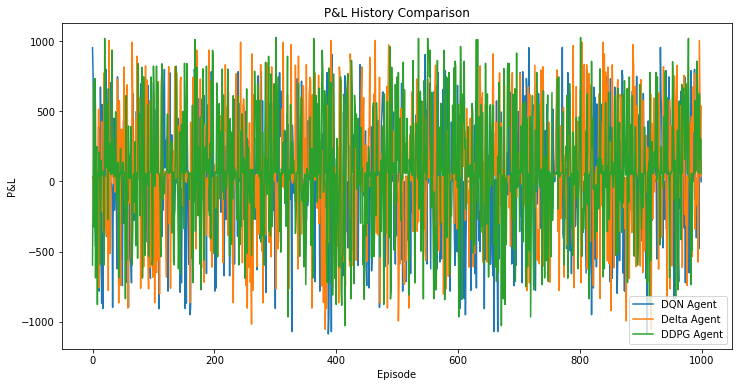

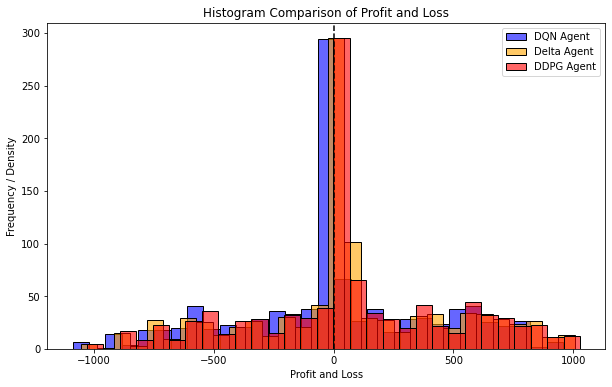

In [11]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

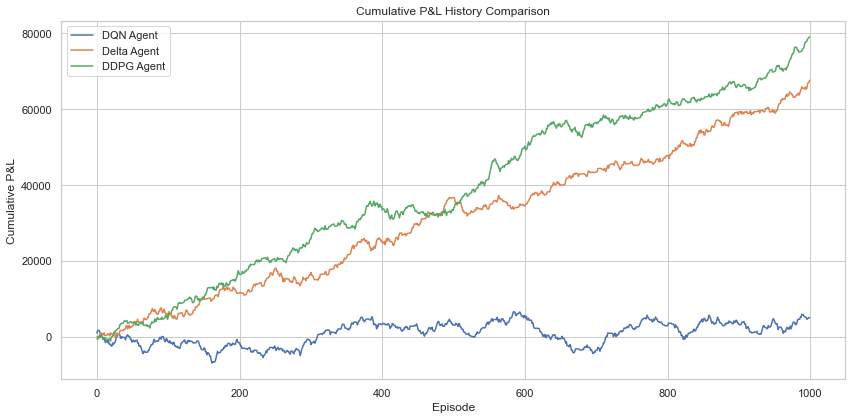

In [12]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

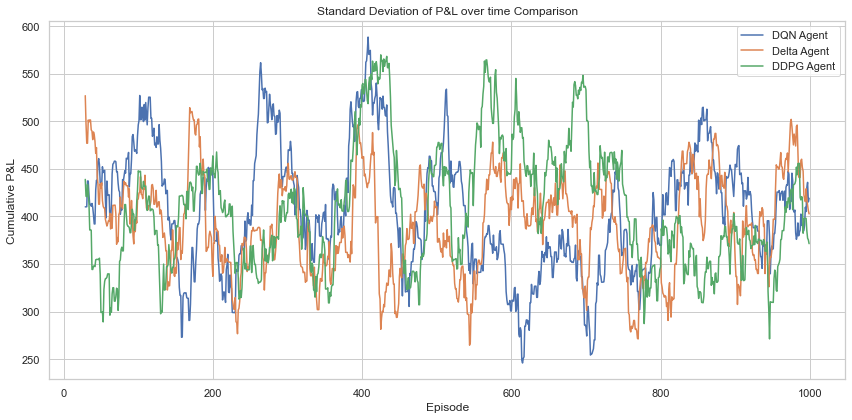

In [13]:
# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(std_pl_delta, label="DQN Agent")
plt.plot(std_pl_dqn, label="Delta Agent")
plt.plot(std_pl_ddpg, label="DDPG Agent")

plt.title("Standard Deviation of P&L over time Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
print("Standard Deviation over period (Delta): ",np.std(pl_history_delta))
print("Standard Deviation over period (DQN): ",np.std(pl_history_dqn))
print("Standard Deviation over period (DDPG): ",np.std(pl_history_ddpg))

Standard Deviation over period (Delta):  415.9925963849695
Standard Deviation over period (DQN):  405.07991348638393
Standard Deviation over period (DDPG):  419.3687838325144
